In [30]:
import xarray
import numpy as np
import pandas
import h5py
import datetime
from ulmo.utils import image_utils
from ulmo.plotting import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
# plot examples of DT matches
# scatterplot from table
# I guess I previously made this by adapting the metadata, but I could also just do from table

table = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2012.parquet')

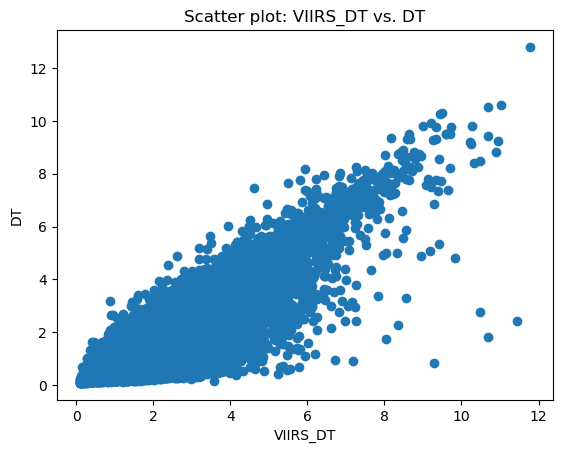

In [32]:
filtered_df = table[table['DT'] != 0]
plt.scatter(filtered_df['VIIRS_DT'], filtered_df['DT'])
plt.xlabel('VIIRS_DT')
plt.ylabel('DT')
plt.title('Scatter plot: VIIRS_DT vs. DT')
plt.show()

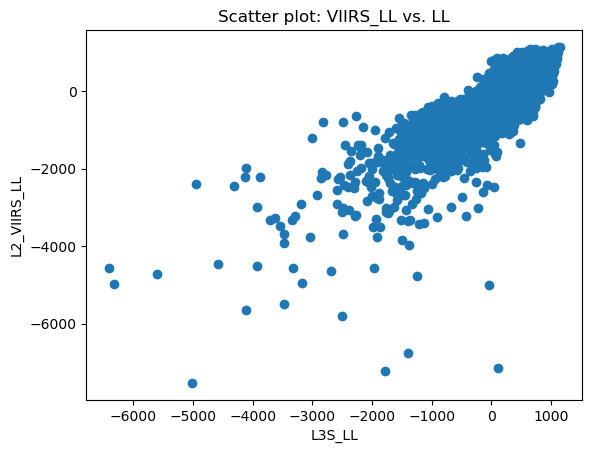

In [33]:
filtered_df = table[table['DT'] != 0]
plt.scatter(filtered_df['LL'], filtered_df['VIIRS_LL'])
plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Scatter plot: VIIRS_LL vs. LL')
plt.show()

In [34]:
filtered_df.loc[:,'diff_DT'] = filtered_df.loc[:,'VIIRS_DT'] - filtered_df.loc[:,'DT']

max_diff_DT = np.max(filtered_df.loc[:,'diff_DT'])
max_diff_DT_df = filtered_df[filtered_df['diff_DT'] == max_diff_DT]
small_diff_DT_df = filtered_df[filtered_df['VIIRS_UID'] == 13281101161369470]

/var/folders/_r/zbkcbh452sgfkpxvpxh952x80000gv/T/ipykernel_1867/3167663137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'diff_DT'] = filtered_df.loc[:,'VIIRS_DT'] - filtered_df.loc[:,'DT']


In [35]:
# this is example with high difference in DT

pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 121248

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_far_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_far_ex = L3S_far_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 178505 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_far_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_far_ex = VIIRS_far_ex[0,...]

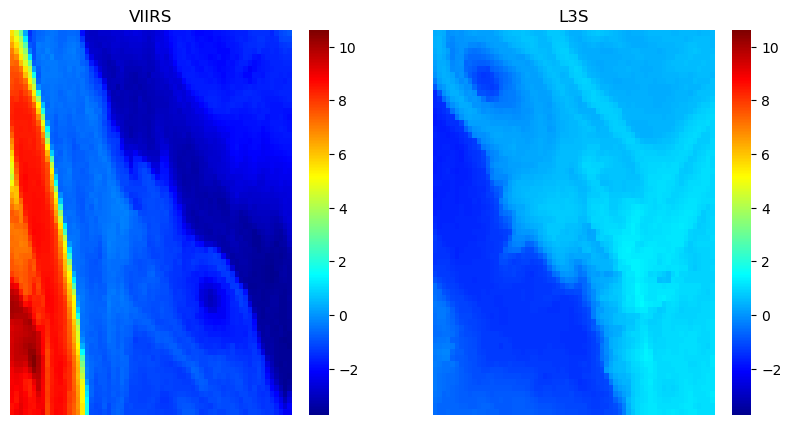

In [7]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_far_ex)
viirs_max = np.max(VIIRS_far_ex)
l3s_min = np.min(L3S_far_ex)
l3s_max = np.max(L3S_far_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_far_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_far_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [8]:
# this is example with low difference in DT

pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 217701

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_close_ex = L3S_close_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 252131 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_close_ex = VIIRS_close_ex[0,...]

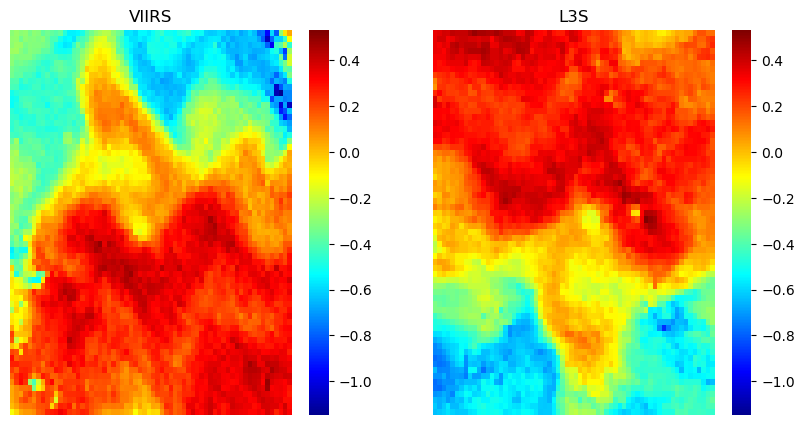

In [9]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_close_ex)
viirs_max = np.max(VIIRS_close_ex)
l3s_min = np.min(L3S_close_ex)
l3s_max = np.max(L3S_close_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_close_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_close_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [10]:
# find an example where VIIRS_LL is about -100 and L3S_LL is about 500

filtered_data = table[
    (table['VIIRS_LL'] >= -105) & (table['VIIRS_LL'] <= -95) &
    (table['LL'] >= 495) & (table['LL'] <= 505)
]

In [11]:
filtered_data[['VIIRS_pp_idx', 'pp_idx', "LL", "VIIRS_LL", 'VIIRS_DT', 'DT']]

,VIIRS_pp_idx,pp_idx,LL,VIIRS_LL,VIIRS_DT,DT
259226,491688,122729,504.460144,-99.02533,1.050018,0.450012


In [12]:
pp_file = "s3://sst-l3s/PreProc/L3S_VIIRS144_2012_preproc.h5"
pp_idx = 122729

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
L3S_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2012_preproc.h5")
#L3S_far_ex = np.flipud(np.fliplr(L3S_row0))[0,...]
L3S_close_ex = L3S_close_ex[0,...]

# get matching VIIRS
pp_file = "s3://viirs/PreProc/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5"
pp_idx = 491688 # these cannot be simply read into the function because now they start with VIIRS_ so do not match

matching_row = pandas.DataFrame({
    'pp_file': [pp_file],
    'pp_idx': [pp_idx]
})
VIIRS_close_ex = image_utils.grab_image(matching_row, local_file = "/Users/rachelstumpf/VIIRS_2012_95clear_192x192_preproc_viirs_std.h5")
VIIRS_close_ex = VIIRS_close_ex[0,...]

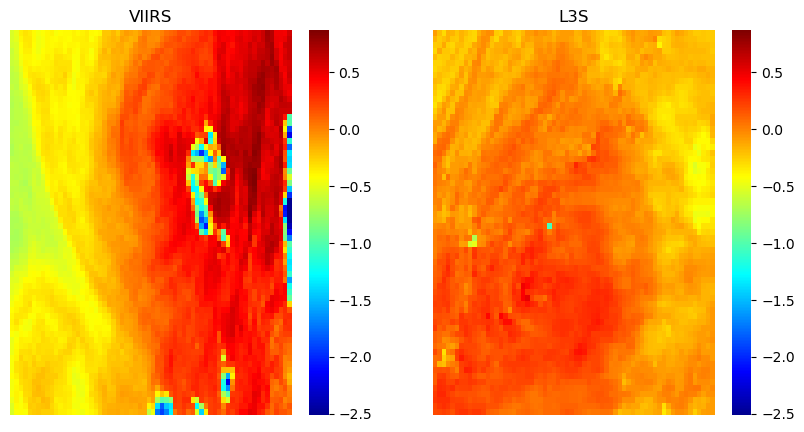

In [13]:
def show_image(img: np.ndarray, cm=None, cbar: bool = True, flipud=True,
               vmnx=(None, None), show=False, set_aspect=None, clbl=None,
               ax=None, title=None):
    """Display the cutout image
    Args:
        img (np.ndarray): cutout image
        cm ([type], optional): Color map to use. Defaults to None.
            If None, load the heatmap above
        cbar (bool, optional): If True, show a color bar. Defaults to True.
        flipud (bool, optional): If True, flip the image up/down. Defaults to True.
        vmnx (tuple, optional): Set vmin, vmax. Defaults to None
        set_aspect (str, optional):
            Passed to ax.set_aspect() if provided
        ax (matplotlib.Axis, optional): axis to use for the plot
        title (str, optional): title for the plot
    Returns:
        matplotlib.Axis: axis containing the plot
    """
    if cm is None:
        _, cm = plotting.load_palette()
    #
    ax = sns.heatmap(np.flipud(img), xticklabels=[],
                     vmin=vmnx[0], vmax=vmnx[1], ax=ax,
                     yticklabels=[], cmap=cm, cbar=cbar,
                     cbar_kws={'label': clbl})  # 'fontsize': 20})
    # Set the title
    if title is not None:
        ax.set_title(title)

    if show:
        plt.show()
    if set_aspect is not None:
        ax.set_aspect(set_aspect)
    #
    return ax

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Calculate the minimum and maximum values for both images
viirs_min = np.min(VIIRS_close_ex)
viirs_max = np.max(VIIRS_close_ex)
l3s_min = np.min(L3S_close_ex)
l3s_max = np.max(L3S_close_ex)

# Use the same vmin and vmax for both images
vmnx = (min(viirs_min, l3s_min), max(viirs_max, l3s_max))

show_image(VIIRS_close_ex, ax=axes[0], title='VIIRS', vmnx=vmnx)

show_image(L3S_close_ex, ax=axes[1], title='L3S', vmnx=vmnx)

plt.show()

In [14]:
filtered_data = table[
    (abs(table['VIIRS_DT'] - table['DT']) <= 0.1)
]

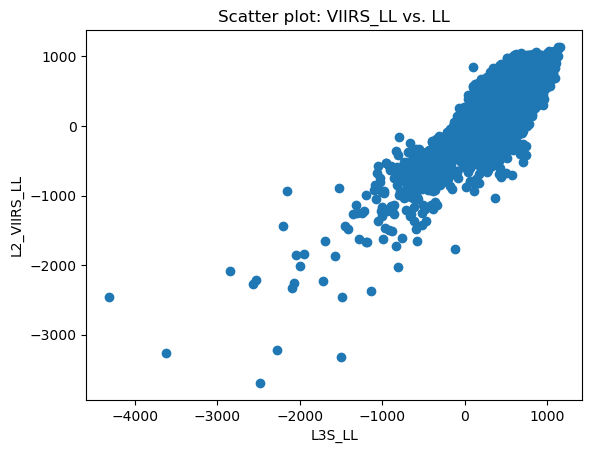

In [15]:
plt.scatter(filtered_data['LL'], filtered_data['VIIRS_LL'])
plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Scatter plot: VIIRS_LL vs. LL')
plt.show()

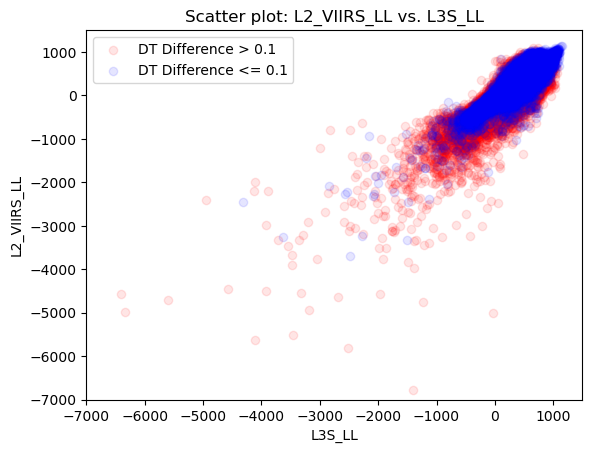

In [16]:
filtered_mask = ~table.index.isin(filtered_data.index)
plt.scatter(table['LL'][filtered_mask], table['VIIRS_LL'][filtered_mask], color='red', alpha = 0.1, label='DT Difference > 0.1')
plt.scatter(filtered_data['LL'], filtered_data['VIIRS_LL'], color='blue', alpha = 0.1, label='DT Difference <= 0.1')

plt.xlabel('L3S_LL')
plt.ylabel('L2_VIIRS_LL')
plt.title('Scatter plot: L2_VIIRS_LL vs. L3S_LL')
plt.xlim(-7000, 1500)
plt.ylim(-7000, 1500)
plt.legend()

plt.show()

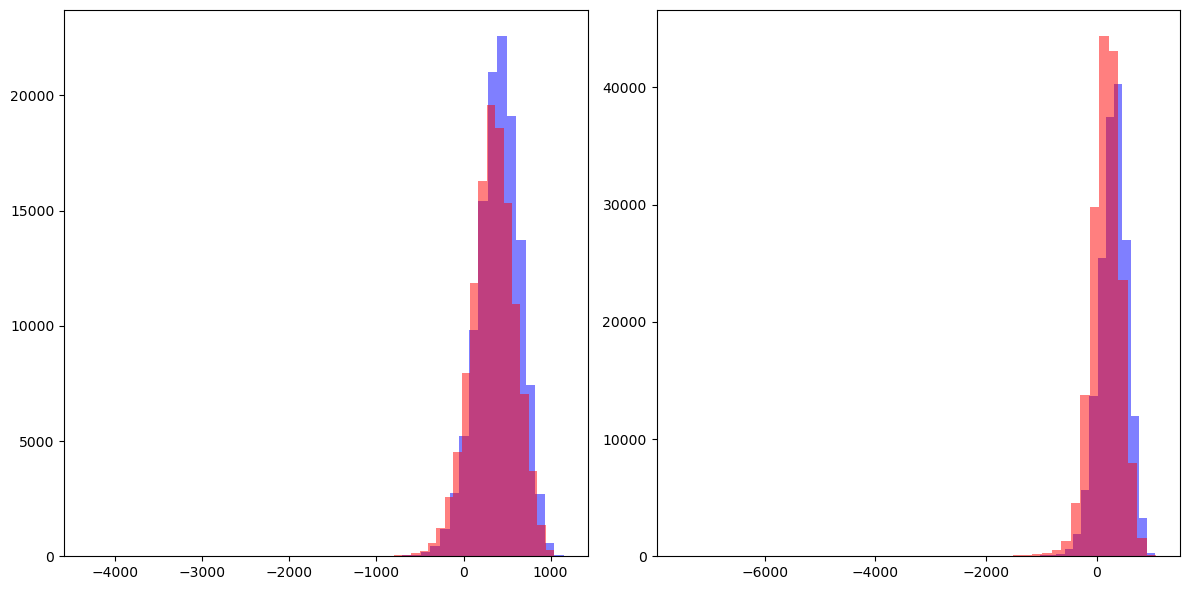

In [17]:
# 2-d histogram: LL for L3S LL for L2 VIIRS, ones that met criteria
# bin size = 50

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(filtered_data['LL'], bins=50, alpha=0.5, label='LL', color='blue')
axs[0].hist(filtered_data['VIIRS_LL'], bins=50, alpha=0.5, label='VIIRS_LL', color='red')

axs[1].hist(table[filtered_mask]['LL'], bins=50, alpha=0.5, label='LL', color='blue')
axs[1].hist(table[filtered_mask]['VIIRS_LL'], bins=50, alpha=0.5, label='VIIRS_LL', color='red')

plt.tight_layout()

plt.show()


In [18]:
filtered_table = table[filtered_mask]
filtered_table = filtered_table[~np.isnan(filtered_table['LL'])]
filtered_table = filtered_table[~np.isnan(filtered_table['VIIRS_LL'])]

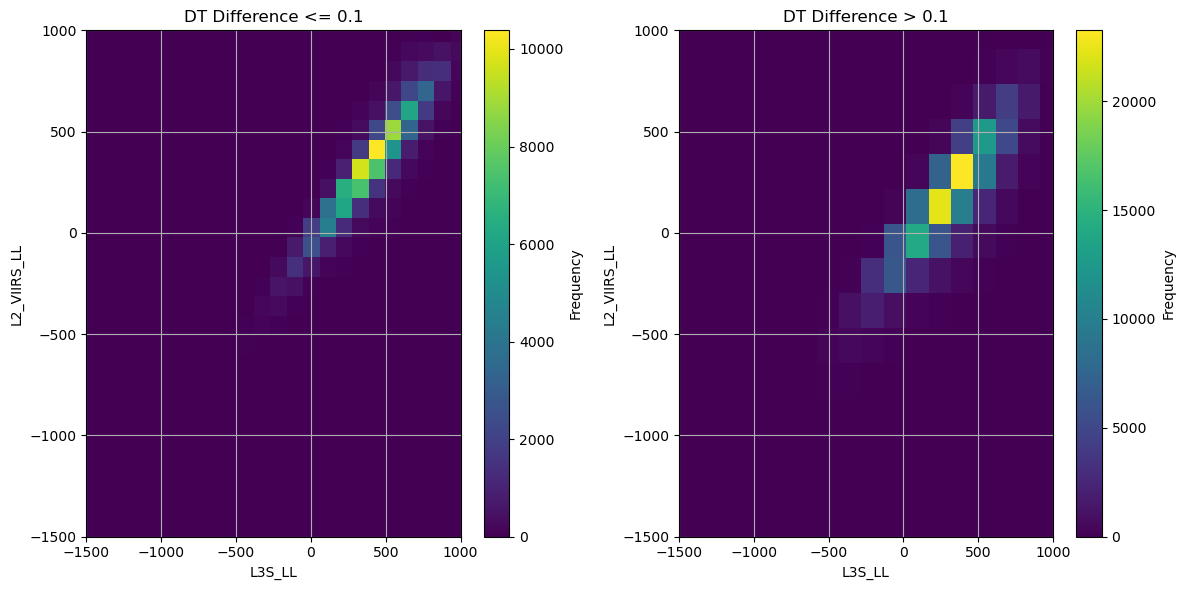

In [19]:
num_bins = 50

# Create a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

hist1 = axs[0].hist2d(filtered_data['LL'], filtered_data['VIIRS_LL'], bins=num_bins, cmap='viridis')
axs[0].set_xlabel('L3S_LL')
axs[0].set_ylabel('L2_VIIRS_LL')
axs[0].set_title('DT Difference <= 0.1')
axs[0].grid()
axs[0].set_xlim(-1500, 1000)
axs[0].set_ylim(-1500, 1000) 

hist2 = axs[1].hist2d(filtered_table['LL'], filtered_table['VIIRS_LL'], bins=num_bins, cmap='viridis')
axs[1].set_xlabel('L3S_LL')
axs[1].set_ylabel('L2_VIIRS_LL')
axs[1].set_title('DT Difference > 0.1')
axs[1].grid()
axs[1].set_xlim(-1500, 1000)
axs[1].set_ylim(-1500, 1000) 

cbar1 = plt.colorbar(hist1[3], ax=axs[0])
cbar1.set_label('Frequency')

cbar2 = plt.colorbar(hist2[3], ax=axs[1])
cbar2.set_label('Frequency')

plt.tight_layout()

plt.show()

In [20]:
filtered_data = table[
    (table['VIIRS_DT'] - table['DT'] > 0.1)
]

filtered_data = filtered_data[~np.isnan(filtered_data['LL'])]
filtered_data = filtered_data[~np.isnan(filtered_data['VIIRS_LL'])]
filtered_mask = ~table.index.isin(filtered_data.index)
filtered_table = table[filtered_mask]
filtered_table = filtered_table[~np.isnan(filtered_table['LL'])]
filtered_table = filtered_table[~np.isnan(filtered_table['VIIRS_LL'])]

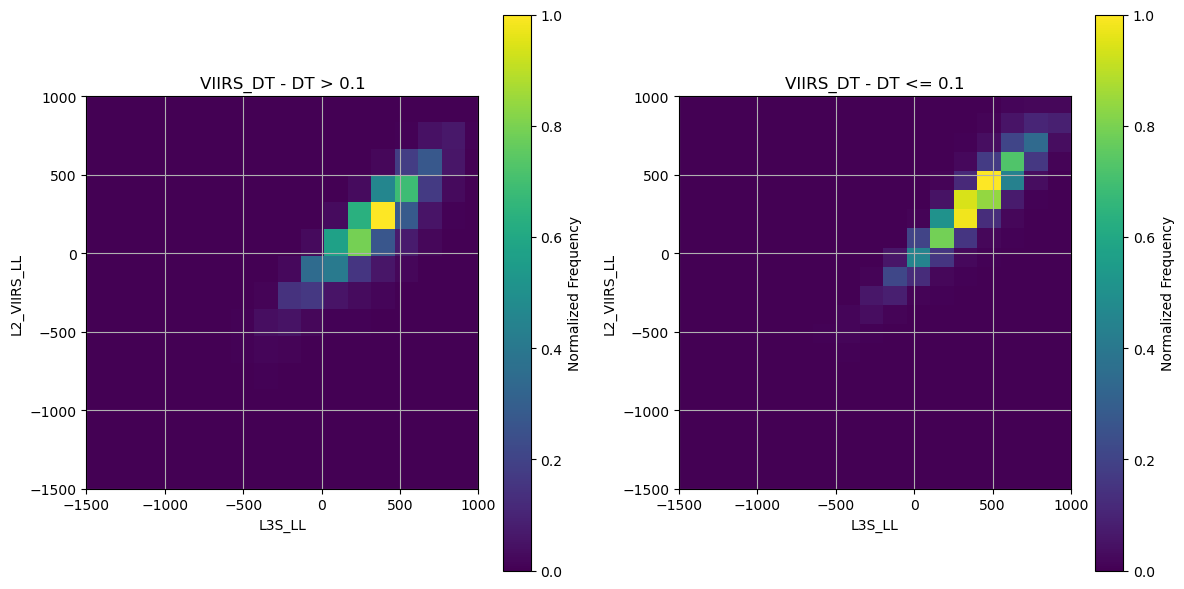

In [21]:
num_bins = 50

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

hist1, xedges1, yedges1, _ = axs[0].hist2d(filtered_data['LL'], filtered_data['VIIRS_LL'], bins=num_bins, cmap='viridis')
axs[0].set_xlabel('L3S_LL')
axs[0].set_ylabel('L2_VIIRS_LL')
axs[0].set_title('VIIRS_DT - DT > 0.1')
axs[0].grid()
axs[0].set_xlim(-1500, 1000)
axs[0].set_ylim(-1500, 1000)

hist2, xedges2, yedges2, _ = axs[1].hist2d(filtered_table['LL'], filtered_table['VIIRS_LL'], bins=num_bins, cmap='viridis')
axs[1].set_xlabel('L3S_LL')
axs[1].set_ylabel('L2_VIIRS_LL')
axs[1].set_title('VIIRS_DT - DT <= 0.1')
axs[1].grid()
axs[1].set_xlim(-1500, 1000)
axs[1].set_ylim(-1500, 1000)

max_count_hist1 = np.max(hist1)
max_count_hist2 = np.max(hist2)

normalized_hist1 = hist1 / max_count_hist1
normalized_hist2 = hist2 / max_count_hist2

im1 = axs[0].imshow(normalized_hist1.T, extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]], origin='lower', cmap='viridis')
im2 = axs[1].imshow(normalized_hist2.T, extent=[xedges2[0], xedges2[-1], yedges2[0], yedges2[-1]], origin='lower', cmap='viridis')

cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Normalized Frequency')
cbar2.set_label('Normalized Frequency')

plt.tight_layout()

plt.show()

In [22]:
# check extraction tables

full_table = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS.parquet')
table_2012 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2012.parquet')
table_2013 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2013.parquet')
table_2014 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2014.parquet')
table_2015 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2015.parquet')
table_2016 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2016.parquet')
table_2017 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2017.parquet')
table_2018 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2018.parquet')
table_2019 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2019.parquet')
table_2020 = pandas.read_parquet('/Users/rachelstumpf/Desktop/parquet/SST_L3S_VIIRS_2020.parquet')

In [23]:
print(len(full_table))
print(len(table_2012) + len(table_2013) + len(table_2014) + len(table_2015) + 
      len(table_2016) + len(table_2017) + len(table_2018) + len(table_2019) + len(table_2020))
# length is same but that's bc failed days will just have Nan's, that must appear when X runs ulmo

2932452
2932452


In [24]:
file_path = '/Users/rachelstumpf/Desktop/PreProc/L3S_VIIRS144_2020_preproc.h5'
with h5py.File(file_path, "r") as h5:
    data = h5['valid'][:]
    metadata = h5['valid_metadata'][:]
cutout_indices = metadata[:, [8, 20, 21, 33, 34]]
decoded_data = [[float(item.decode('utf-8')) for item in row] for row in cutout_indices]
column_names = ['VIIRS_DT', 'lat', 'lon', 'T90', 'T10']
df = pandas.DataFrame(decoded_data, columns = column_names)

df.loc[:,'DT'] = df.loc[:,'T90'] - df.loc[:,'T10']

In [25]:
decoded_data = [[item.decode('utf-8') for item in row] for row in metadata]

In [26]:
h5_dates = pandas.to_datetime(pandas.DataFrame(decoded_data).loc[:,13])
table_dates = table_2020.iloc[:,13]

In [27]:
h5_dates_unique = h5_dates.dt.date
table_dates_unique = table_dates.dt.date

h5_dates_unique = h5_dates_unique.unique()
table_dates_unique = table_dates_unique.unique()

missing_dates = set(table_dates_unique) - set(h5_dates_unique)

missing_dates

{datetime.date(2020, 12, 31)}

In [28]:
desired_date = pandas.to_datetime("2020-12-31").date()
table_2020[table_2020['VIIRS_datetime'].dt.date == desired_date]['VIIRS_datetime']
# there are 770 rows of the table with the date 2020-12-31

#len(decoded_data) # 338876
#len(table_2020) # 339788
# this is a 912 row difference, which doens't add up right

339018   2020-12-31 00:00:00
339019   2020-12-31 00:00:00
339020   2020-12-31 00:00:00
339021   2020-12-31 00:00:00
339022   2020-12-31 00:00:00
                 ...        
339783   2020-12-31 22:50:00
339784   2020-12-31 22:50:00
339785   2020-12-31 22:50:00
339786   2020-12-31 23:30:00
339787   2020-12-31 23:40:00
Name: VIIRS_datetime, Length: 770, dtype: datetime64[ns]

In [29]:
year = 2020
start_date = pandas.to_datetime(f"{year}-01-01")
end_date = pandas.to_datetime(f"{year}-12-31")
all_dates_in_year = pandas.date_range(start_date, end_date)

all_dates_in_year_list = all_dates_in_year.to_list()

missing_dates = list(set(pandas.to_datetime(all_dates_in_year_list).date) - set(h5_dates_unique))

print("Missing dates in the year:")
print(missing_dates)

Missing dates in the year:
[datetime.date(2020, 12, 31)]
